### Women’s Clothing E-Commerce dataset revolving around the reviews written by customers

In [1]:
## import all the libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re 
import nltk
nltk.download('wordnet')
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn import metrics

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Atif\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
## Load the dataset 

df = pd.read_csv("dataset.csv")
df.head(2)

Unnamed: 0  Clothing ID  Age Title  \
0           0          767   33   NaN   
1           1         1080   34   NaN   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   

   Positive Feedback Count Division Name Department Name Class Name  
0                        0     Initmates        Intimate  Intimates  
1                        4       General         Dresses    Dresses

## EDA - Exploratory Data Analysis Starts 

In [3]:
# Statistical view of the dataset

df.describe()

Unnamed: 0   Clothing ID           Age        Rating  \
count  23486.000000  23486.000000  23486.000000  23486.000000   
mean   11742.500000    918.118709     43.198544      4.196032   
std     6779.968547    203.298980     12.279544      1.110031   
min        0.000000      0.000000     18.000000      1.000000   
25%     5871.250000    861.000000     34.000000      4.000000   
50%    11742.500000    936.000000     41.000000      5.000000   
75%    17613.750000   1078.000000     52.000000      5.000000   
max    23485.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count  
count     23486.000000             23486.000000  
mean          0.822362                 2.535936  
std           0.382216                 5.702202  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.000000                 3.000000  
max           1.000000               122.000000

In [4]:
## information about the dataframe including the data types of each column and memory usage of the entire data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
## To see the shape of the dataframe

df.shape

(23486, 11)

In [9]:
## Observing which rate has occured how manny times

df.Rating.value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

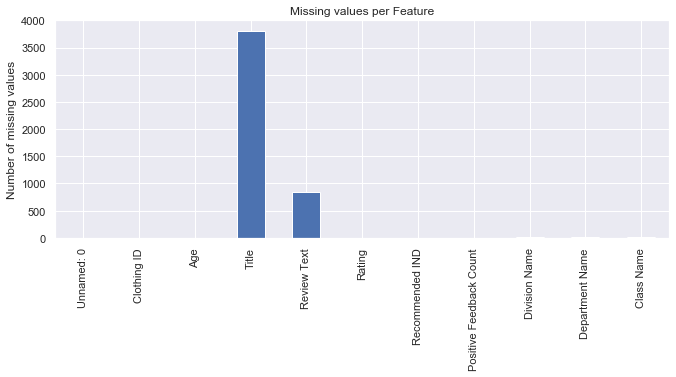

In [7]:
## Finding the missing values

sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(df).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing values per Feature')

plt.show()

### From the above plot, we can see that Title and Review Text has missing values

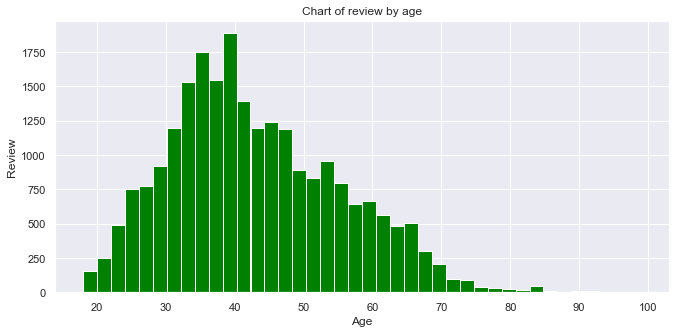

In [10]:
# plotting review based on the Age

sns.set(rc={'figure.figsize':(11,5)})
plt.hist(df['Age'],bins=40, color='green')
plt.xlabel("Age")
plt.ylabel("Review")
plt.title("Chart of review by age")

plt.show()

#### We can see mostly 28 - 55 years old people reviewed most

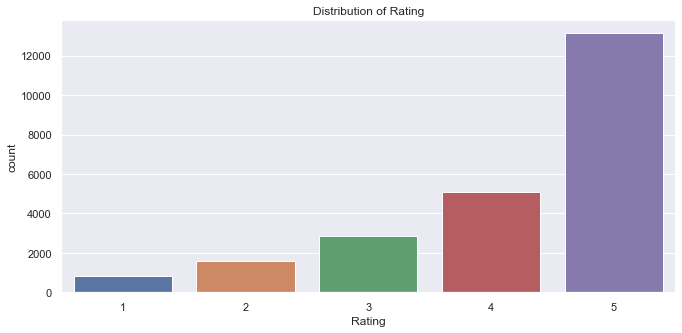

In [12]:
#Plotting frequency distribution of rating

sns.countplot(x='Rating',data=df)
plt.title("Distribution of Rating")

plt.show()

#### We can see most people has rated 5 

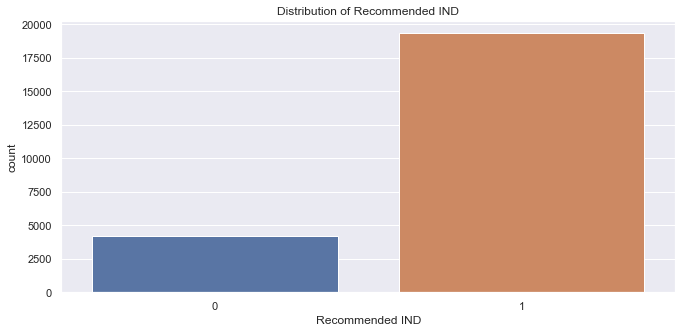

In [13]:
#Plotting frequency distribution of Recommended IND


sns.countplot(x='Recommended IND',data=df)
plt.title("Distribution of Recommended IND")

plt.show()

In [84]:
import plotly.express as px

px.histogram(df, x = df['Rating'], color = df["Recommended IND"])

#### 0 is not recommended and 1 is recomended which means people recomended the clothing store

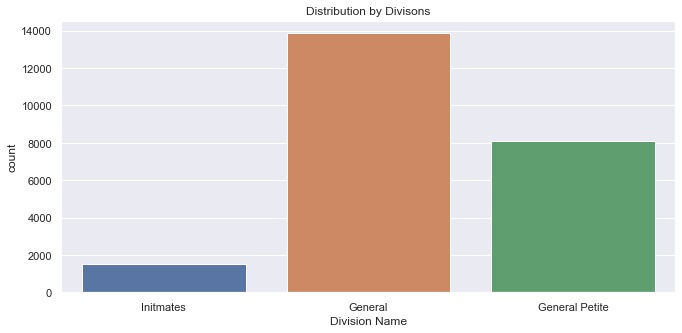

In [14]:
#Plotting Frequency distribution of division name

sns.countplot(x='Division Name',data=df)
plt.title("Distribution by Divisons")

plt.show()

### People has chosen to buy mostly fromm General Division

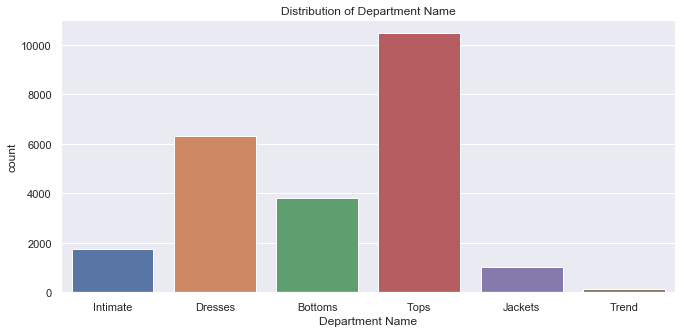

In [15]:
## Plotting Frequency distribution of department name
sns.countplot(x='Department Name',data=df)
plt.title("Distribution of Department Name")

plt.show()

### Most sale is from Tops and then Dresses

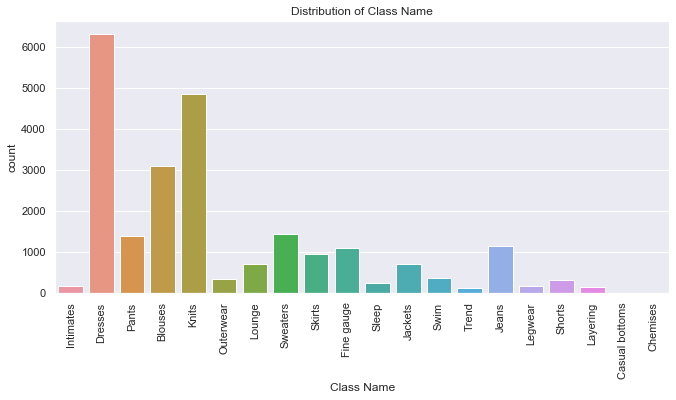

In [16]:
## Plotting Frequency distribution of Class

sns.countplot(x='Class Name',data=df)
plt.title("Distribution of Class Name")
plt.xticks(rotation=90)

plt.show()

### Dresses and Knits has the most sales

In [17]:
### Dividing recomendation into two parts - Recommended and not Recommended item 

recommended = df[df['Recommended IND']==1]
not_recommended = df[df['Recommended IND']==0]

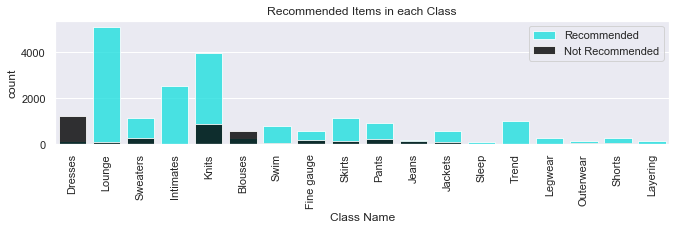

In [18]:
#Recommended and Not Recommended item in each class

ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax2 = plt.xticks(rotation=90)
ax2 = sns.countplot(recommended['Class Name'], color="cyan", alpha = 0.8, label = "Recommended")
ax2 = sns.countplot(not_recommended['Class Name'], color="black", alpha = 0.8, label = "Not Recommended")
ax2 = plt.title("Recommended Items in each Class")
ax2 = plt.legend()


### People have recommended Lounge the most

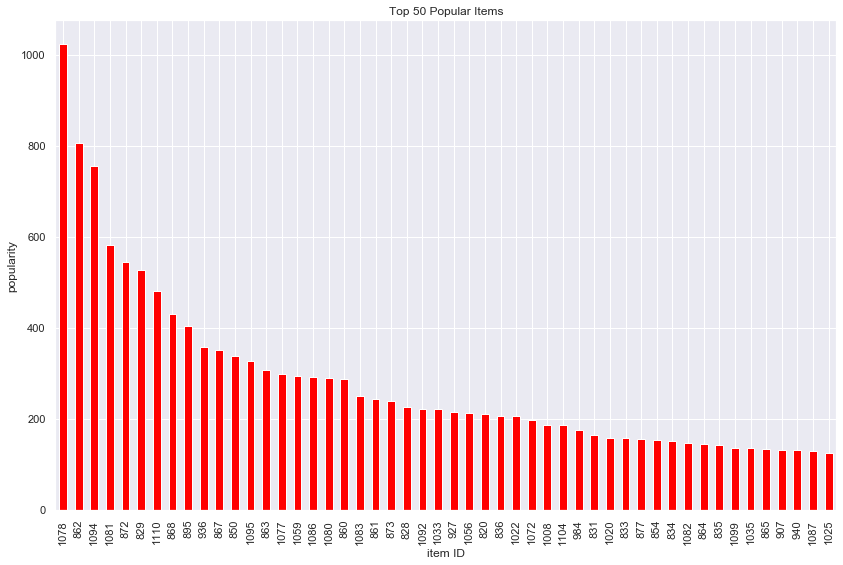

In [19]:
## Top 50 Most Popular item

fig = plt.figure(figsize=(14, 9))

plt.xticks(rotation=45)
plt.xlabel('item ID')
plt.ylabel('popularity')
plt.title("Top 50 Popular Items")
df['Clothing ID'].value_counts()[:50].plot(kind='bar', color="red");

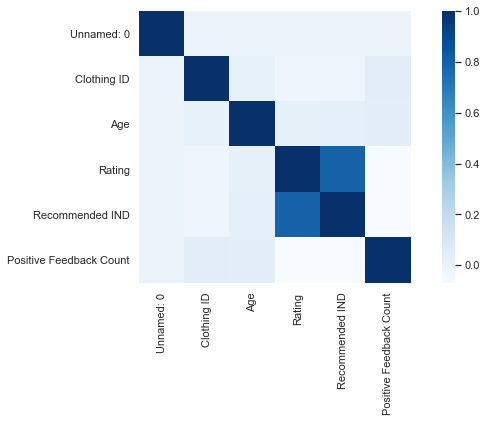

In [20]:
##Check co relation between the variables
corr = df.corr()

sns.heatmap(corr, cmap="Blues", square=True);

### It can be seen that features are extremely corelated 

# Let's clean the Dataset now before implementing fitting to model

In [21]:
## Filling the missing values with space

df['Review Text'] = df['Review Text'].fillna('')

In [22]:
## Creating a function for cleaning

def cleanTxt(review):
    text = review.lower()
    
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)
    
    stemmer = nltk.stem.WordNetLemmatizer()
    text = " ".join(stemmer.lemmatize(token) for token in tokens)
    text = re.sub("[^a-z']"," ", text)
    return text

In [24]:
## Applying the function to clean

df["Clean_Review"] = df["Review Text"].apply(cleanTxt)

In [25]:
## Checking the length after cleaning

print(len(df["Review Text"]))
print(len(df["Clean_Review"]))

23486
23486


### We have our clean review now! 

In [26]:
## Set rating flase if it is >=3 else set it as positive

df = df[df['Rating'] !=3]
df['Sentiment'] = df['Rating'] >=4
df["Sentiment"]

0         True
1         True
3         True
4         True
5        False
         ...  
23478    False
23479     True
23480     True
23481     True
23485     True
Name: Sentiment, Length: 20615, dtype: bool

In [27]:
#Set True sentiment  as positive review and False as negative review

positive_reviews = df[df['Sentiment'] == True]
negative_reviews = df[df['Sentiment'] == False]

In [28]:
## Creating a function for visualizing most occured words

def wc(df):
    plt.figure(figsize = (75,50))
    wc = WordCloud(background_color = "white", max_words = 5000,  max_font_size = 100,
                  width= 500, height=300, random_state=21)
    wc.generate(' '.join(df))
    plt.imshow(wc)
    plt.axis('off')


In [29]:
a = positive_reviews['Review Text']  ## all positive reviews
b = negative_reviews['Review Text']  ## all negative reviews

## Check the length of two variables\

print(len(a))  
print(len(b))

18208
2407


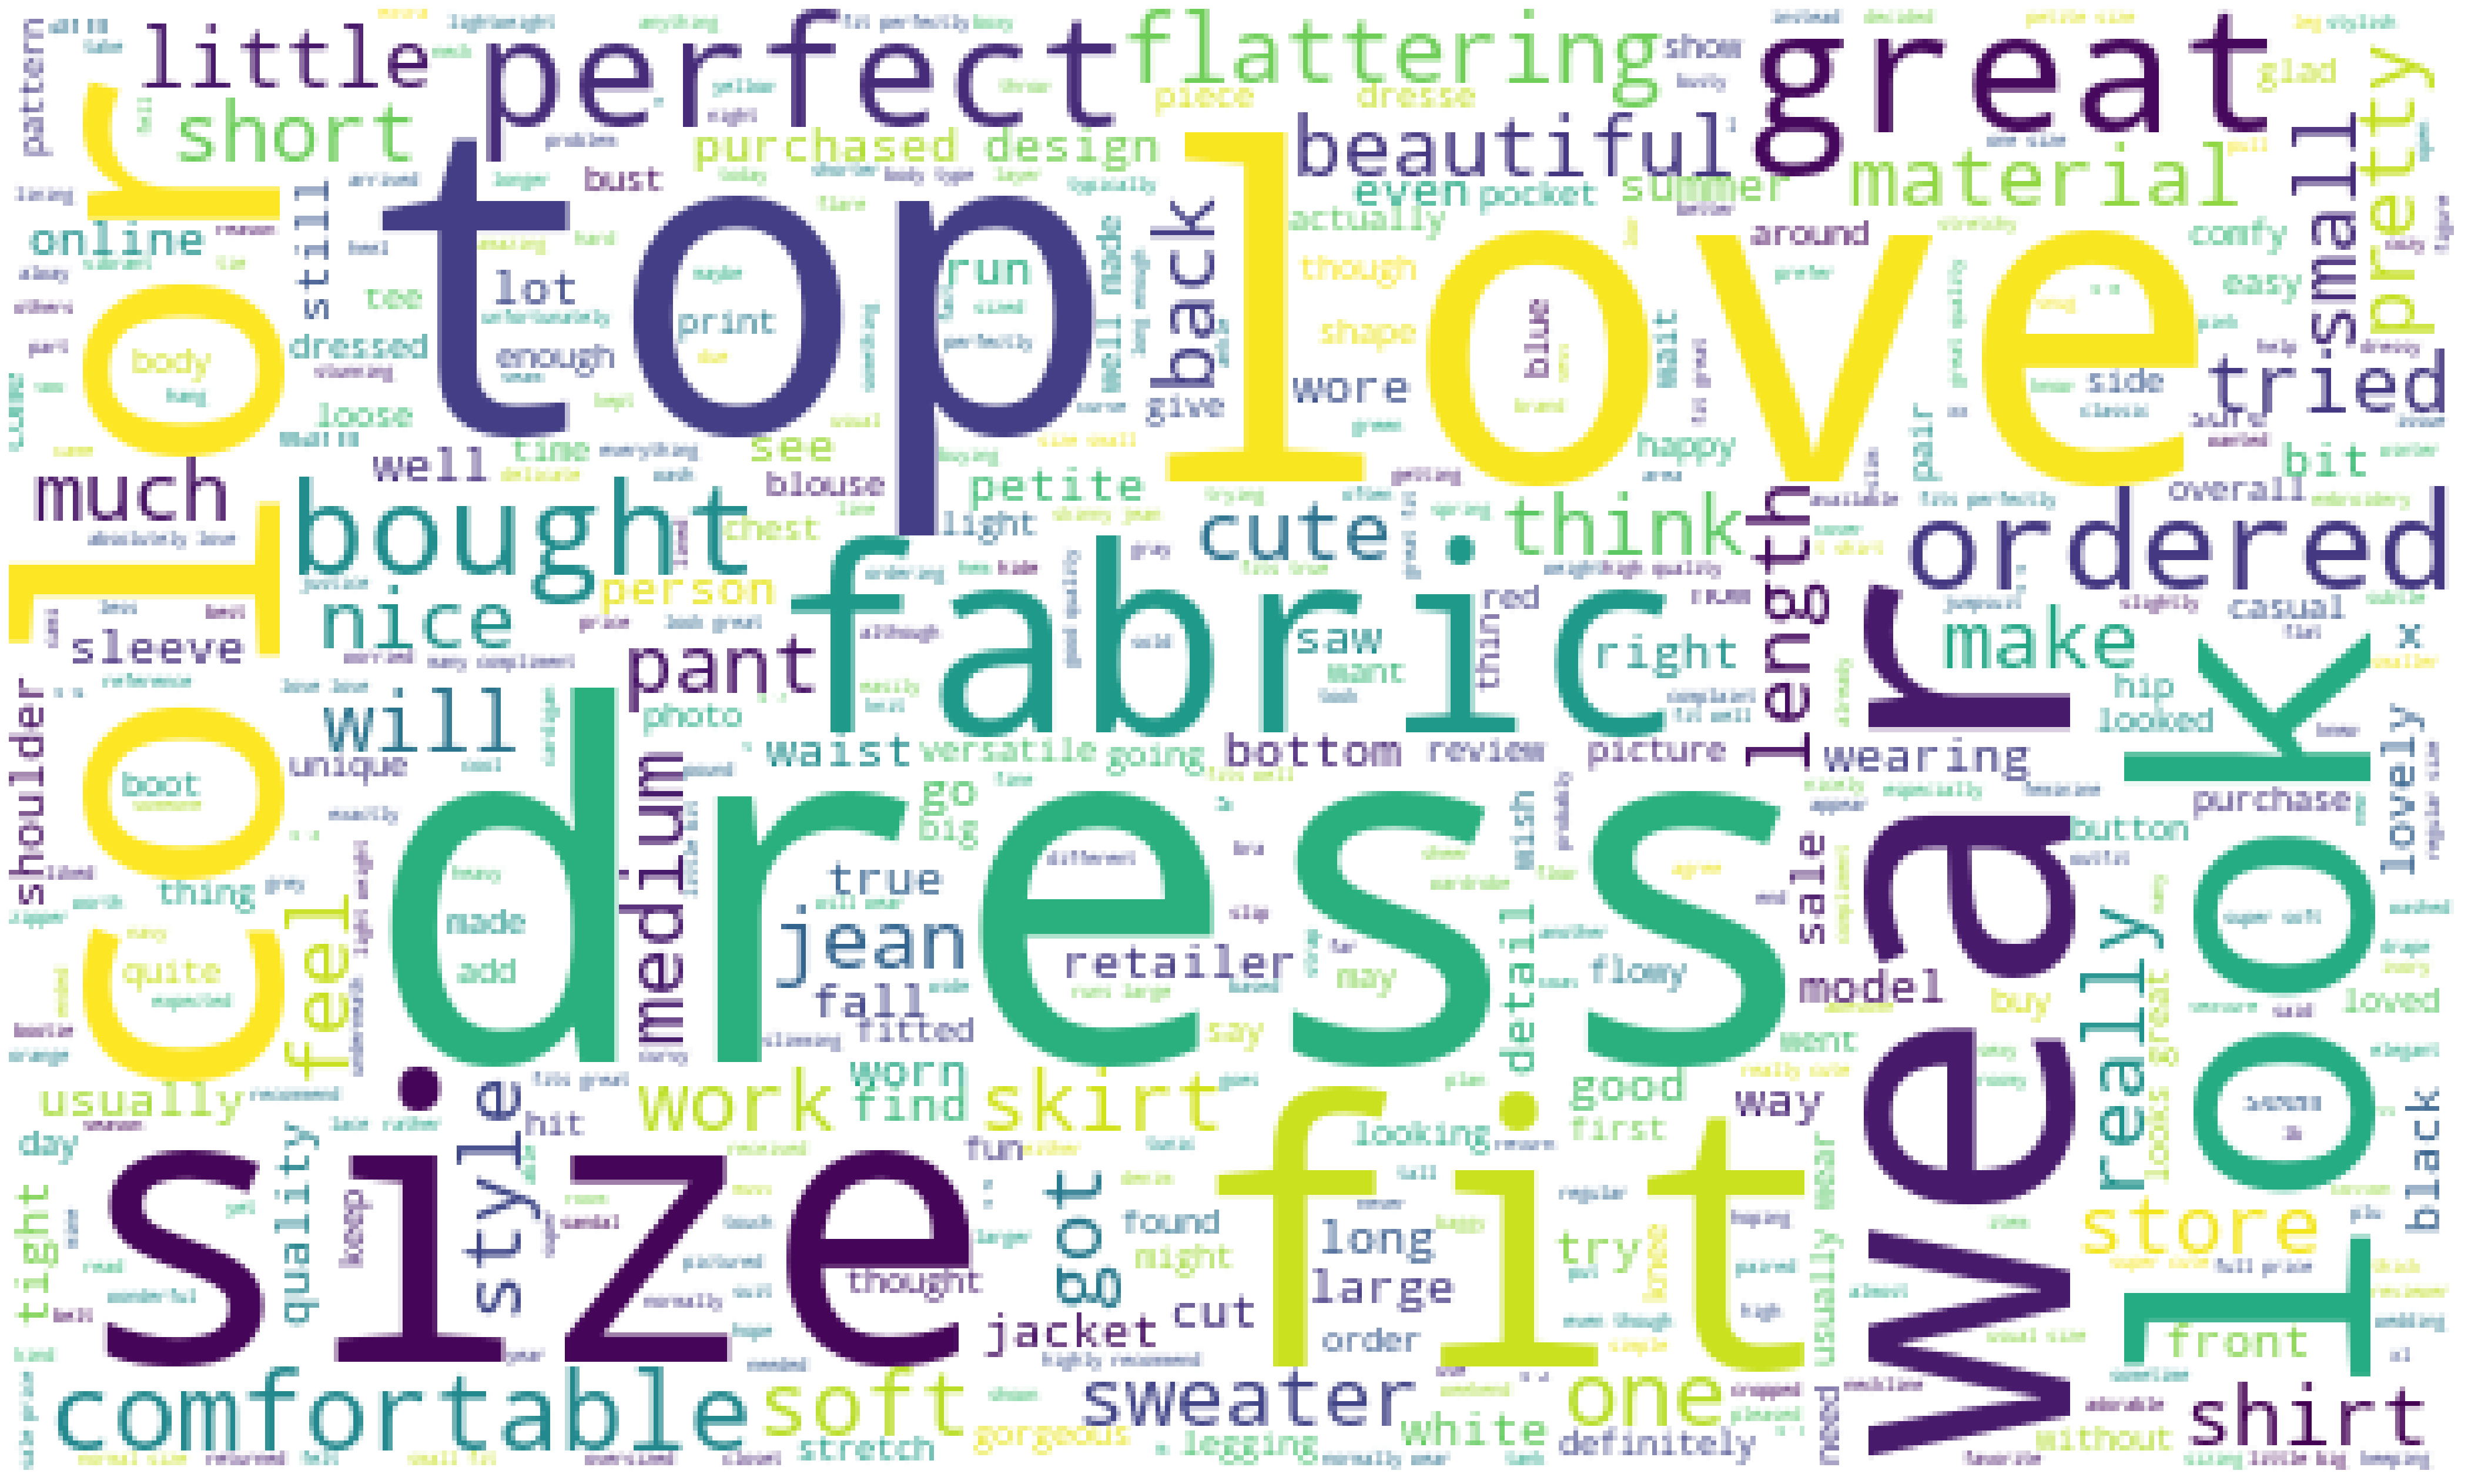

In [30]:
#Plotting positive reviews

wc(a)

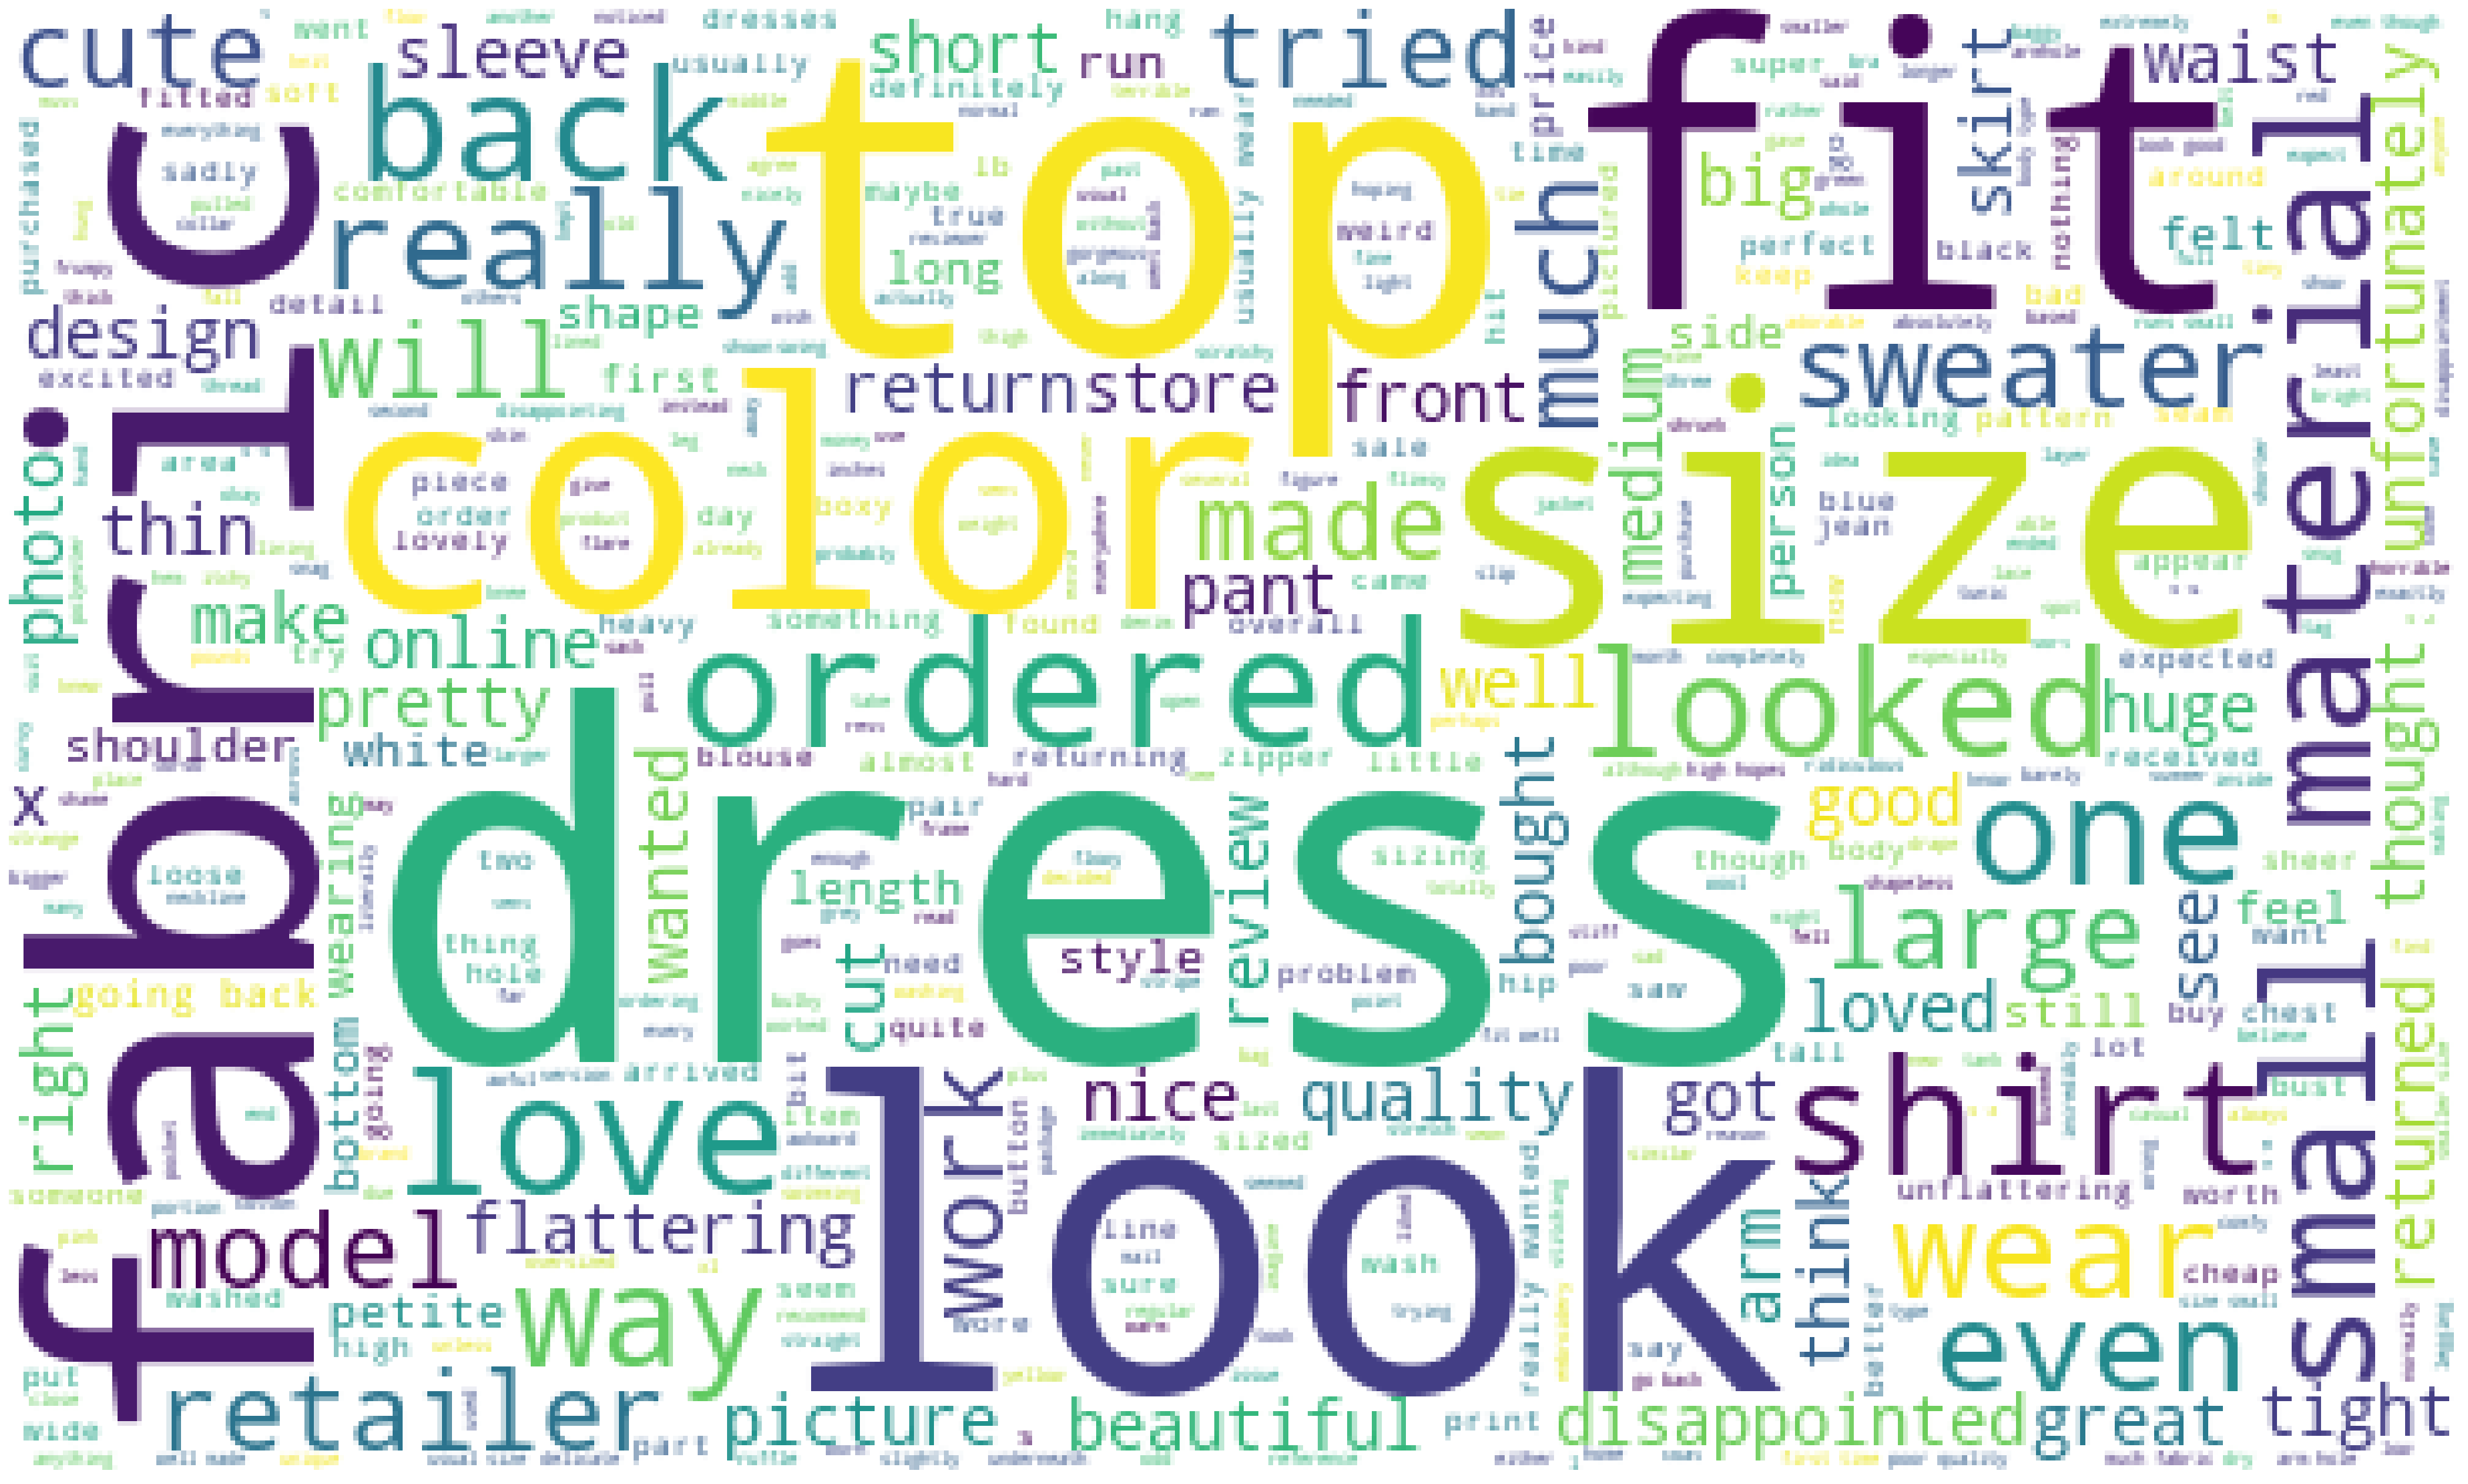

In [31]:
## Plotting Negative reviews 
wc(b)

### EDA ends here !!! We are good to go for our ML model

# Prediction with Logistic Regression to find the ROC curve

In [32]:
## Importing scikit-learn libraries

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Review Text'])
y = df['Recommended IND']

In [33]:
## Doing a normal split with a ratio of 80:20

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=0)

In [34]:
## fitting training data to model

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Atif\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
## Predicting with test data

logreg_pred = logreg.predict(X_test)

In [36]:
#making confusion matrix

from sklearn.metrics import confusion_matrix 
con_mat = confusion_matrix(y_test,logreg_pred)
con_mat

array([[ 1072,   965],
       [  367, 14088]], dtype=int64)

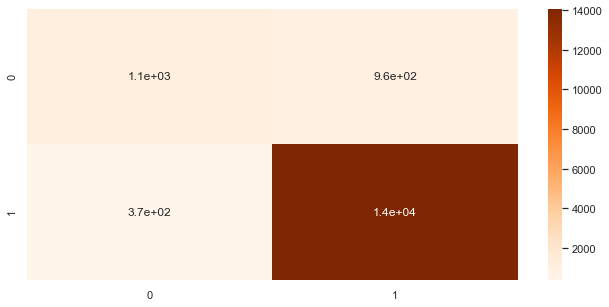

In [37]:
## ploting the confusion matrix

ax = sns.heatmap(con_mat, cmap='Oranges', annot=True)

In [38]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,logreg_pred)*100,"%")

91.92335677904438 %


### Our model gives 91% accuracy which is not bad

In [39]:
## calculate the False positive rate (fpr) and True Positive rate (tpr) for all thresholds of the classification

from sklearn import metrics

probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

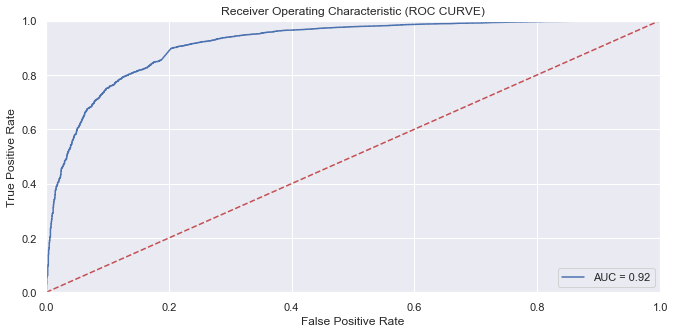

In [40]:
## Finally Plotting the ROC Curve

plt.title('Receiver Operating Characteristic (ROC CURVE)')

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', )
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.axis('on')
plt.show()

### AUC of 0.5 suggests no discrimination, (0.7 to 0.8) is considered acceptable (0.8 to 0.9) is considered excellent more than 0.9 is considered outstanding




# ----------------------

In [74]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
pred_prob2 = model2.predict(X_test)

print(pred_prob2)

[1 1 1 ... 1 1 1]


In [75]:
print('----------------------------------------------------------------------')
print(accuracy_score(y_test,pred_prob2)*100,"%")

----------------------------------------------------------------------
87.78195488721805 %


### Our Model gives 87% accuracy 

In [76]:
# print the shapes of X and y
# X is our features matrix with 150 x 4 dimension
print(X.shape)
# y is our response vector with 150 x 1 dimension
print(y.shape)

(20615, 13336)
(20615,)


In [77]:
preds2 = pred_prob2[:,]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)

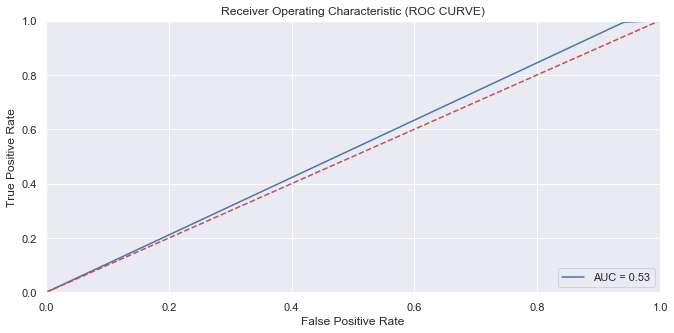

In [80]:
## Finally Plotting the ROC Curve for K-means

plt.title('Receiver Operating Characteristic (ROC CURVE)')

plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', )
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.axis('on')
plt.show()

### AUC of 0.5 suggests no discrimination, (0.7 to 0.8) is considered acceptable (0.8 to 0.9) is considered excellent more than 0.9 is considered outstanding


#### We need to do validation as the AUC -  ROC 0.5 which suggests no discrimination

## Building a very basic Naive Bayes Classifier 

In [82]:
#Building a Naive Bayes classifier to predict sentiment

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

#train the model 
clf.fit(X_train, y_train)

#Measure accuracy on test set

accuracy = clf.score(X_test, y_test)
print('----------------------------------------------------------------------')
print( 'Accuracy', accuracy*100, "%")


----------------------------------------------------------------------
Accuracy 88.87945670628183 %


### NB Classifier model gives 88% accuracy